In [1160]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [1161]:
ticker = "^BVSP"
data = yf.Ticker(ticker).history(period="2y")

data['Tomorrow_Close'] = data['Close'].shift(-1)
data['Day_Before_Close'] = data['Close'].shift(1)
data['Five_Days_Before_Close'] = data['Close'].shift(5)
data['Seven_Days_Before_Close'] = data['Close'].shift(7)

data.dropna(inplace=True)

data['Goal'] = (data['Tomorrow_Close'] > data['Close']).astype(int)

del data['Dividends']
del data['Stock Splits']

data.head()

,Open,High,Low,Close,Volume,Tomorrow_Close,Day_Before_Close,Five_Days_Before_Close,Seven_Days_Before_Close,Goal
Date,,,,,,,,,,
2022-07-07 00:00:00-03:00,98722.0,101420.0,98722.0,100730.0,12696300,100289.0,98719.0,98542.0,100591.0,0
2022-07-08 00:00:00-03:00,100732.0,101577.0,99958.0,100289.0,9730400,98212.0,100730.0,98954.0,99622.0,0
2022-07-11 00:00:00-03:00,100282.0,100282.0,97854.0,98212.0,8893400,98271.0,100289.0,98609.0,98542.0,1
2022-07-12 00:00:00-03:00,98212.0,98737.0,97253.0,98271.0,12566300,97881.0,98212.0,98295.0,98954.0,0
2022-07-13 00:00:00-03:00,98258.0,98928.0,97403.0,97881.0,12208100,96121.0,98271.0,98719.0,98609.0,0


In [1162]:
# Definindo datasets "separados" por um ano entre si para teste e treinamento

train = data.iloc[0:250, ]
test = data.iloc[250:500, ]

Text(0.5, 1.0, 'Preço de Fechamento do Ibovespa nos Últimos 2 Anos')

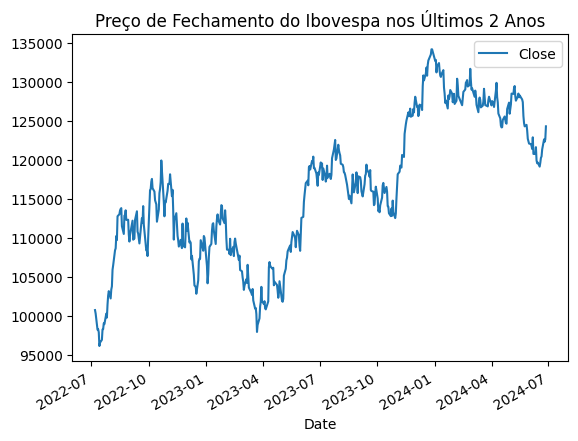

In [1163]:
data.plot.line(y="Close", use_index=True)
plt.title("Preço de Fechamento do Ibovespa nos Últimos 2 Anos")

In [1164]:
# Definindo testes e treinamentos

features = ['Close', 'Volume', 'Goal', 'Day_Before_Close', 'Five_Days_Before_Close']

X_train = train[features]
X_test = test[features]
y_train = train[['Tomorrow_Close']]
y_test = test[['Tomorrow_Close']]

In [1165]:
# Mostrar Treinamento e Teste

print(f"TREINO\n{X_train}\nTESTE\n{X_test}")

TREINO
                              Close    Volume  Goal  Day_Before_Close  \
Date                                                                    
2022-07-07 00:00:00-03:00  100730.0  12696300     0           98719.0   
2022-07-08 00:00:00-03:00  100289.0   9730400     0          100730.0   
2022-07-11 00:00:00-03:00   98212.0   8893400     1          100289.0   
2022-07-12 00:00:00-03:00   98271.0  12566300     0           98212.0   
2022-07-13 00:00:00-03:00   97881.0  12208100     0           98271.0   
...                             ...       ...   ...               ...   
2023-06-30 00:00:00-03:00  118087.0         0     1          118383.0   
2023-07-03 00:00:00-03:00  119673.0   8907500     0          118087.0   
2023-07-04 00:00:00-03:00  119076.0   6555200     1          119673.0   
2023-07-05 00:00:00-03:00  119549.0  10959000     0          119076.0   
2023-07-06 00:00:00-03:00  117426.0  11025700     1          119549.0   

                           Five_Days_Before

In [1166]:
# Normalizando os dados

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1167]:
# Treinando o modelo

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [1168]:
# Fazendo as previsões

y_pred = model.predict(X_test_scaled)
y_pred

array([[117597.95404346],
       [116790.8389819 ],
       [118373.14513228],
       [118777.41785244],
       [117915.53414283],
       [118849.84086392],
       [116958.40352963],
       [116597.21970061],
       [118626.4068904 ],
       [119163.90081945],
       [121117.55638512],
       [122232.39582688],
       [122871.75435756],
       [121098.424494  ],
       [121032.79406469],
       [121212.44864445],
       [120609.15288917],
       [120032.50257387],
       [119673.30637434],
       [119332.6797595 ],
       [118340.29205985],
       [118224.00590782],
       [117934.45442597],
       [117285.45621099],
       [117210.44421664],
       [116903.06915721],
       [115721.93361012],
       [115101.92035969],
       [114543.87393625],
       [116217.88372373],
       [114292.19969994],
       [115632.28158451],
       [117189.9325636 ],
       [116774.99473543],
       [115763.51254816],
       [116931.49244849],
       [118061.98116836],
       [117060.3083844 ],
       [1163

In [1169]:
# Criterios de avaliacao do modelo

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"erro medio absoluto (MAE): {mae}")
print(f"erro quadratico medio (MSE): {mse}")
print(f"coeficiente de determinacao (R2): {r2}")
print(f"erro percentual absoluto medio (MAPE): {mape}%")

erro medio absoluto (MAE): 596.445404248957
erro quadratico medio (MSE): 511123.0980974648
coeficiente de determinacao (R2): 0.9837991019430422
erro percentual absoluto medio (MAPE): 0.4844789735458172%


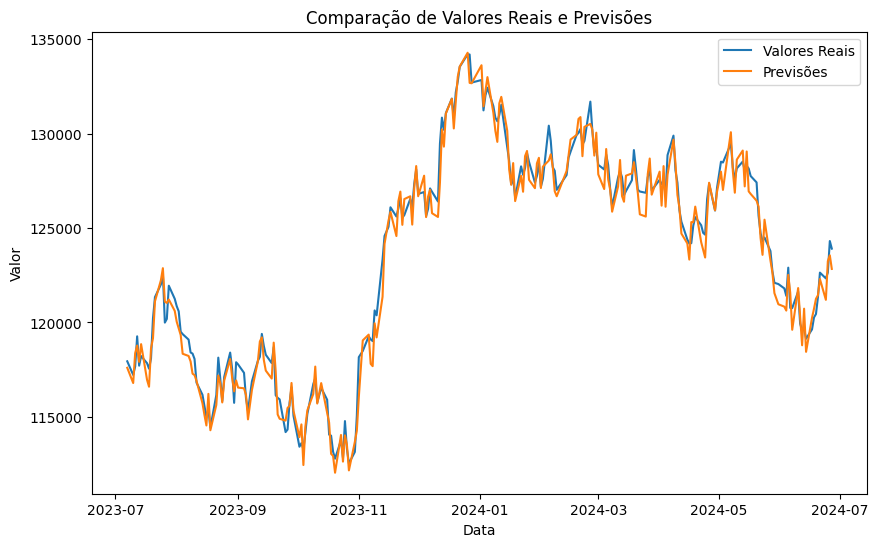

In [1170]:
# Vizualicao das previsoes

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Valores Reais')  # índice 'y_test' 
plt.plot(y_test.index, y_pred, label='Previsões')             # Garantir que 'y_pred' esteja alinhado com 'y_test'
plt.legend()
plt.xlabel('Data') 
plt.ylabel('Valor')
plt.title('Comparação de Valores Reais e Previsões')  # Adicionando título ao gráfico
plt.show()

Previsões para os próximos 7 dias:
[[123245.8121184 ]
 [123553.54271887]
 [122832.75168851]]


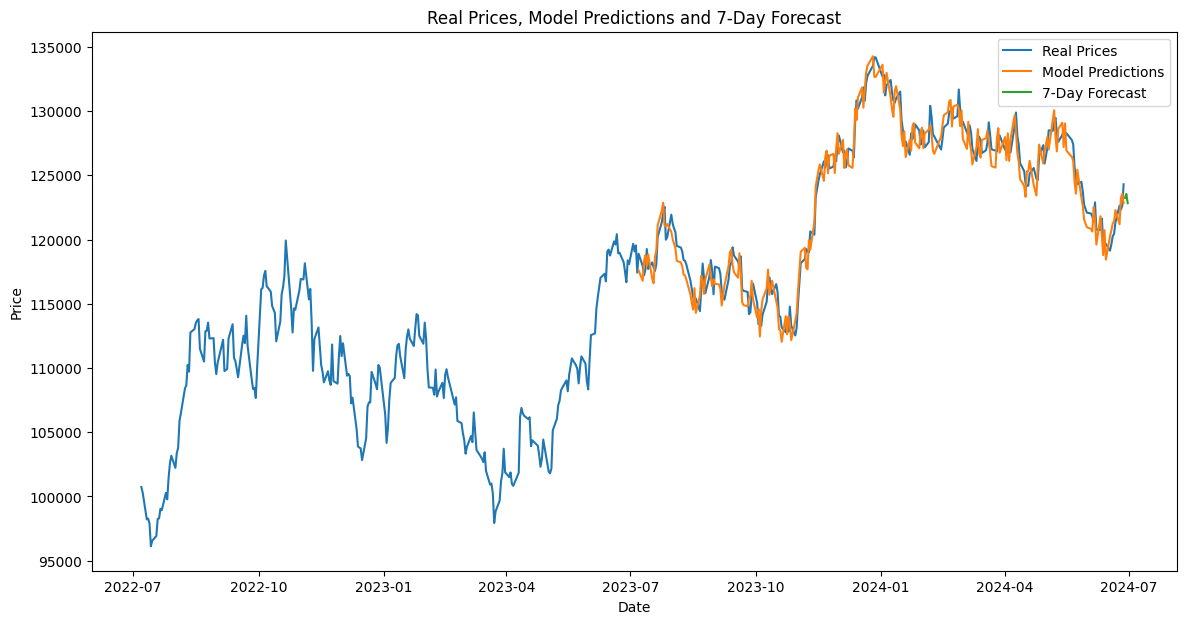

In [1171]:
# Últimos pontos de dados para prever o futuro
last_data_points = data.iloc[-3:]

# Preparando os últimos dados como base para previsão futura
X_future = last_data_points[features]
X_future_scaled = scaler.transform(X_future)

# Previsão para os próximos 7 dias
future_predictions = model.predict(X_future_scaled)
print(f"Previsões para os próximos 7 dias:\n{future_predictions}")

# Data de início para previsões futuras
start_date = last_data_points.index.max() + pd.Timedelta(days=1)
end_date = start_date + pd.Timedelta(days=2)
future_dates = pd.date_range(start=start_date, end=end_date)

# Criando um DataFrame para as previsões futuras
future_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted_Price'])

# Plotando os resultados
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Real Prices')
plt.plot(y_test.index, y_pred, label='Model Predictions')
plt.plot(future_df.index, future_df['Predicted_Price'], label='7-Day Forecast')
plt.title('Real Prices, Model Predictions and 7-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()